In [39]:
from pysheds.grid import Grid
import rasterio
import geopandas as gpd
import pandas as pd
# from google.colab import drive
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import colors
from shapely import Point, MultiPoint, LineString, line_merge, MultiLineString

Correct DEM, do flow direction and flow accumulation. No longer needed, ran once.

In [ ]:
# grid = Grid.from_raster(r"C:\Users\dego\Documents\local_files\Fieldwork\stroubles_poverty_dem.tif")
# dem = grid.read_raster(r"C:\Users\dego\Documents\local_files\Fieldwork\stroubles_poverty_dem.tif")

# filled_dem = grid.fill_pits(dem)
# flooded_dem = grid.fill_depressions(filled_dem)
# inflated_dem = grid.resolve_flats(flooded_dem)
# dirmap = (64, 128, 1, 2, 4, 8, 16, 32)
# fdir = grid.flowdir(inflated_dem, dirmap=dirmap)
# acc = grid.accumulation(fdir, dirmap=dirmap)


# with rasterio.open('/content/drive/MyDrive/field_data/stroubles_poverty_dem.tif') as src:
#     meta = src.meta

# with rasterio.open(r"C:\Users\dego\Documents\local_files\Fieldwork\corrected_dem.tif", 'w', **meta) as dst:
#     dst.write(inflated_dem, 1)

# with rasterio.open(r"C:\Users\dego\Documents\local_files\Fieldwork\acc.tif", 'w', **meta) as dst:
#     dst.write(acc, 1)

# with rasterio.open(r"C:\Users\dego\Documents\local_files\Fieldwork\fdir.tif", 'w', **meta) as dst:
#     dst.write(fdir, 1)

Load in precomputed DEM, fdir, and acc

In [2]:
grid = Grid.from_raster(r"C:\Users\dego\Documents\local_files\Fieldwork\corrected_dem.tif")
dem = grid.read_raster(r"C:\Users\dego\Documents\local_files\Fieldwork\corrected_dem.tif")

acc = grid.read_raster(r"C:\Users\dego\Documents\local_files\Fieldwork\acc.tif")
fdir = grid.read_raster(r"C:\Users\dego\Documents\local_files\Fieldwork\fdir.tif")

In [ ]:
dirmap = (64, 128, 1, 2, 4, 8, 16, 32)

ppx, ppy = 545545.0, 4124458.0

x_snap, y_snap = grid.snap_to_mask(acc > 100000, (ppx, ppy))

bhcatch = grid.catchment(x=x_snap, y=y_snap, fdir=fdir, dirmap=dirmap, xytype='coordinate')


clipped_catch = grid.view(bhcatch)

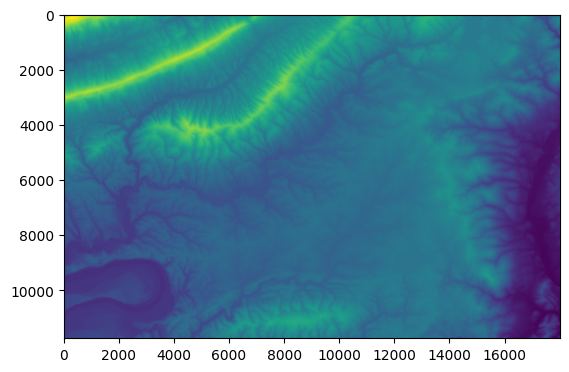

In [95]:
plt.imshow(dem)

In [ ]:
grid.clip_to(bhcatch)
lines = grid.extract_river_network(fdir, acc>8000, dirmap=dirmap)

SystemError: CPUDispatcher(<function _affine_map_vec_numba at 0x0000024A7FDFB920>) returned a result with an exception set

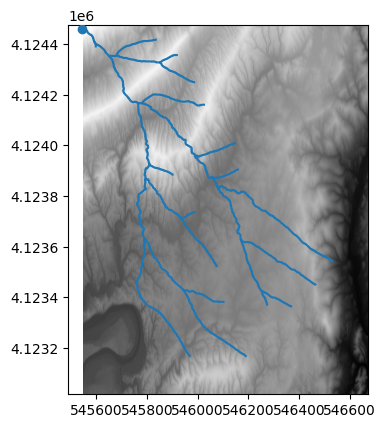

In [ ]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

for l in lines['features']:
    reach = np.asarray(l['geometry']['coordinates'])
    ax.plot(reach[:, 0], reach[:, 1], c='tab:blue')
ax.scatter(ppx, ppy, zorder=5)

In [6]:
gdf = gpd.GeoDataFrame(lines['features'], crs=32617)[['id', 'geometry']]
gdf.to_file(r"C:\Users\dego\Documents\local_files\Fieldwork\flowlines.shp")

In [7]:
## map field reach ids to gdf ids

translator = {
    0: 'L',
    1: 'UNKNOWN', # ARTIFACT OF FLOW ACCUMULATION, NOT A CHANNEL
    2: 'O', # DRY
    3: 'M',
    4: 'K',
    5: 'K',
    6: 'UNKNOWN', # NOT MAPPED IN ANY SURVEY, LOOKED COLLUVIAL
    7: 'V',
    8: 'U',
    9: 'I', # NOT MAPPED IN ANY SURVEY, LOOKED COLLUVIAL
    10: 'Q', # DRY
    11: 'A',
    12: 'R', #JUST A SPRING, recorded 0 on survey 1 and width at spring on survey 2, not even mapped in 3. RECOMMEND EXCLUDE
    13: 'P',
    14: 'C',
    15: 'S', # DRY
    16: 'X', # DRY
    17: 'Y', # DRY
    18: 'W', # erroneously called C in first survey
    19: 'B',
    20: 'F',
    21: 'F',
    22: 'F',
    23: 'F',
    24: 'J',
    25: 'T',
    26: 'H',
    27: 'G',
    28: 'G',
    29: 'G',
    30: 'E',
    31: 'E',
    32: 'E'
}

gdf['reach'] = gdf['id'].map(translator)
gdf

,id,geometry,reach
0,0,"LINESTRING (545835 4124417, 545834 4124417, 54...",L
1,1,"LINESTRING (545598 4124390, 545598 4124391, 54...",UNKNOWN
2,2,"LINESTRING (545918 4124356, 545917 4124356, 54...",O
3,3,"LINESTRING (545986 4124249, 545985 4124249, 54...",M
4,4,"LINESTRING (545852 4124327, 545851 4124327, 54...",K
5,5,"LINESTRING (545678 4124353, 545677 4124353, 54...",K
6,6,"LINESTRING (546025 4124160, 546024 4124160, 54...",UNKNOWN
7,7,"LINESTRING (546147 4124009, 546146 4124008, 54...",V
8,8,"LINESTRING (546159 4123904, 546158 4123904, 54...",U
9,9,"LINESTRING (545901 4123884, 545900 4123884, 54...",I


In [8]:
reachlines = []
ridlist = ['A', 'B', 'E', 'F', 'G', 'H', 'J', 'K', 'M', 'P', 'R', 'T', 'W']
for rid in ridlist:
    reach = (line_merge(MultiLineString(gdf.loc[gdf.reach == rid].geometry.tolist())))

    reachlines.append(reach)
mapped_reaches = gpd.GeoDataFrame({'reach': ridlist, 'geometry': reachlines}, crs=32617)
# egdf = gpd.GeoDataFrame(geometry=[reach_e], crs=32617)
# egdf.plot()

In [9]:
s1_pts = pd.read_csv(r"C:\Users\dego\Documents\local_files\Fieldwork\GPS\Waypoints_21-MAY-25.csv")
s1_pts = s1_pts.rename(columns={'ID': 'id'})
s1_pts.loc[0, 'id'] = 'T001'
s1_pts.loc[1, 'id'] = 'J001'
s1_pts.loc[2, 'id'] = 'J032'
s1_pts.loc[10, 'id'] = 'W001'
s1_pts = gpd.GeoDataFrame(s1_pts, geometry=gpd.points_from_xy(s1_pts.Easting, s1_pts.Northing, crs=32617)).set_index('id')
s1_heads = s1_pts.loc[['M001', 'J001', 'A001', 'W001', 'T001']][['geometry']]

s2_pts = gpd.read_file(r"C:\Users\dego\Documents\local_files\Fieldwork\GPS\Waypoints_04-JUN-25.gpx", layer='waypoints').to_crs(32617)
s2_pts = s2_pts.rename(columns={'name': 'id'})
s2_pts = s2_pts.set_index('id')
s2_heads = s2_pts[['geometry']].loc[['M001', 'J001', 'A001', 'W001', 'T001']]

s3_pts = gpd.read_file(r"C:\Users\dego\Documents\local_files\Fieldwork\GPS\Waypoints_18-JUN-25.gpx", layer='waypoints').to_crs(32617)
s3_pts = s3_pts.rename(columns={'name': 'id'})
s3_pts = s3_pts.set_index('id')
s3_heads = s3_pts[['geometry']].loc[['M001', 'J001', 'A001', 'W001', 'T001']]

merged_heads = s1_heads.merge(s2_heads, on='id', suffixes=('_s1', '_s2')).merge(s3_heads, on='id').rename(columns={'geometry': 'geometry_s3'})

headlist = []
idlist = []
for id in merged_heads.index:
    idlist.append(id)
    headlist.append(MultiPoint(merged_heads.loc[id].tolist()).centroid)

    channel_heads = gpd.GeoDataFrame({'id': idlist, 'geometry': headlist})

In [10]:
channel_heads['reach'] = channel_heads.apply(lambda row: row['id'][0], axis=1)
channel_heads

,id,geometry,reach
0,M001,POINT (545836.234 4124325.684),M
1,J001,POINT (545802.496 4123362.967),J
2,A001,POINT (546287.433 4123722.768),A
3,W001,POINT (546263.371 4123414.406),W
4,T001,POINT (546072.459 4123243.118),T


In [11]:
clist = []
r1s = []
r2s = []

for i1 in range(len(mapped_reaches)):
    for i2 in range(len(mapped_reaches)):
        if i1 != i2:
            l1 = mapped_reaches.loc[i1].geometry
            r1 = mapped_reaches.loc[i1].reach
            l2 = mapped_reaches.loc[i2].geometry
            r2 = mapped_reaches.loc[i2].reach

            c = l1.intersection(l2)

            clist.append(c)
            r1s.append(r1)
            r2s.append(r2)

In [12]:
mapped_reaches

,reach,geometry
0,A,"LINESTRING (546532 4123543, 546531 4123544, 54..."
1,B,"LINESTRING (546171 4123627, 546170 4123628, 54..."
2,E,"LINESTRING (545766 4124166, 545765 4124167, 54..."
3,F,"LINESTRING (546079 4123837, 546078 4123838, 54..."
4,G,"LINESTRING (545789 4123633, 545788 4123634, 54..."
5,H,"LINESTRING (545943 4123429, 545942 4123430, 54..."
6,J,"LINESTRING (545969 4123168, 545968 4123169, 54..."
7,K,"LINESTRING (545852 4124327, 545851 4124327, 54..."
8,M,"LINESTRING (545986 4124249, 545985 4124249, 54..."
9,P,"LINESTRING (545935 4123713, 545934 4123714, 54..."


<Axes: >

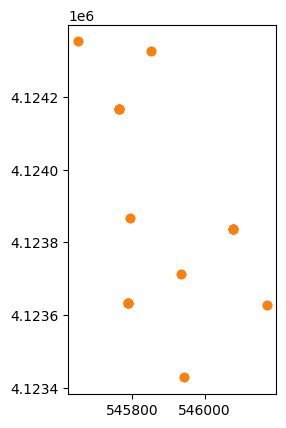

In [14]:
confluences = gpd.GeoDataFrame({'r1': r1s, 'r2': r2s, 'geometry': clist}, crs=32617)
confluences = confluences.loc[~(confluences.geometry.is_empty)]
fig, ax = plt.subplots()
confluences.plot(ax=ax, zorder=1, color='tab:orange')

In [165]:
mapped_reaches.total_bounds

array([ 545545.999981, 4123168.000022,  546531.999981, 4124460.000022])

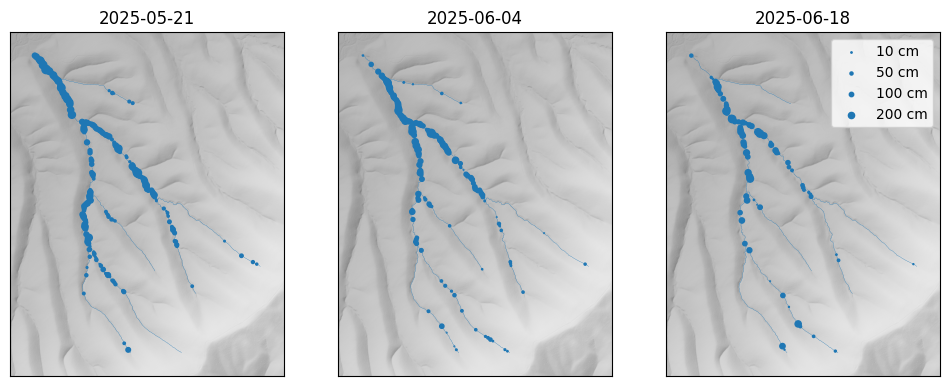

In [180]:
l, b, r, t = mapped_reaches.total_bounds


fig, axs = plt.subplots(1, 3, figsize=(12, 5))

files = [r"C:\Users\dego\Documents\local_files\Fieldwork\BM_surveys\survey_20250521.csv", 
         r"C:\Users\dego\Documents\local_files\Fieldwork\BM_surveys\survey_20250604.csv", 
         r"C:\Users\dego\Documents\local_files\Fieldwork\BM_surveys\survey_20250618.csv"]
dates = ['2025-05-21', '2025-06-04', '2025-06-18']
for f in range(len(files)):
    widths = pd.read_csv(files[f])
    widths = widths[['reach_id', 'meas_num', 'strahler_order', 'wet_in', 'dry_in']]
    widths = widths.loc[widths.meas_num >= 0]
    widths['site_id'] = widths.apply(lambda row: f'{row.reach_id}{int(row.meas_num):03d}', axis=1)
    widths['wet_cm'] = widths.wet_in * 2.54
    widths['dry_cm'] = widths.dry_in * 2.54

    reach_pts = []
    for rid in ridlist:
        rwidths = widths.loc[widths.reach_id == rid]
        segment = mapped_reaches.loc[mapped_reaches.reach == rid].reset_index().geometry[0]

        nps = len(rwidths)
        pointlist = []
        interp_distance = segment.length / (nps + 1)
        for pnum in range(1, nps + 1):
            pointlist.append(segment.interpolate(pnum * interp_distance))


        reach_pts.append(gpd.GeoDataFrame({'geometry': pointlist, 'width': rwidths['wet_cm']}, crs=32617))

    rpd = pd.concat(reach_pts)
    rpd['display_width'] = (rpd.width) / 10



    ax = axs.flatten()[f]
    # if f != 0:
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    
    
    show(hs, cmap='Grays_r', transform=grid.affine, ax=ax, zorder=1, vmin=hs.min(), vmax=hs.max(), alpha=0.5)
    show(dem, cmap='Grays_r', transform=grid.affine, ax=ax, zorder=0, vmin=dem.min(), vmax=dem.max())


    mapped_reaches.plot(ax=ax, linewidth=0.2, zorder=2)

    ax.set_title(dates[f])

    rpd.plot(markersize='display_width', ax=ax, zorder=3)
            
    ax.set_xlim(l - 100, r + 100)
    ax.set_ylim(b - 100, t + 100)

    if f == len(files) - 1:
        size_handles = []
        size_labels = [f'10 cm', '50 cm', '100 cm', '200 cm']
        for s, label in zip([1, 5, 10, 20], size_labels):
            size_handles.append(plt.scatter([], [], s=s, marker='o', color='tab:blue', label=label))

        ax.legend(handles=size_handles, labels=size_labels, loc='upper right')



In [204]:
ridlist

['A', 'B', 'E', 'F', 'G', 'H', 'J', 'K', 'M', 'P', 'R', 'T', 'W']

In [211]:
files = [r"C:\Users\dego\Documents\local_files\Fieldwork\BM_surveys\survey_20250521.csv", 
         r"C:\Users\dego\Documents\local_files\Fieldwork\BM_surveys\survey_20250604.csv", 
         r"C:\Users\dego\Documents\local_files\Fieldwork\BM_surveys\survey_20250618.csv"]

lens = []
areas = []
dates = ['2025-05-21', '2025-06-04', '2025-06-18']
for f in range(len(files)):
    widths = pd.read_csv(files[f])
    widths = widths[['reach_id', 'meas_num', 'strahler_order', 'wet_in', 'dry_in']]
    widths = widths.loc[widths.meas_num >= 0]
    widths['site_id'] = widths.apply(lambda row: f'{row.reach_id}{int(row.meas_num):03d}', axis=1)
    widths['wet_cm'] = widths.wet_in * 2.54
    widths['dry_cm'] = widths.dry_in * 2.54
    widths['wet_m'] = widths.wet_cm / 100

    widths = widths.loc[widths.reach_id.isin(ridlist)]

    areas.append((widths.wet_m * 10).sum())
    lens.append(len(widths.loc[widths.wet_m > 0]) * 10)

print(lens)
print(areas)

[1980, 1540, 830]
[np.float64(1870.71), np.float64(1317.752), np.float64(771.9060000000002)]


In [201]:
import datetime
sl24 = pd.read_excel(r'C:\Users\dego\Documents\local_files\Fieldwork\Go_DataPull_20251007.xlsx', sheet_name='2024')
sl24 = sl24.loc[3:][['TOA5', 'CR1000']]
sl25 = pd.read_excel(r'C:\Users\dego\Documents\local_files\Fieldwork\Go_DataPull_20251007.xlsx', sheet_name='Sheet2')
sl25 = sl25.loc[3:][['TOA5', 'CR1000']]

SL = pd.concat([sl24, sl25])
SL['date'] = pd.to_datetime(SL['TOA5']).dt.date

SL_date = SL.groupby('date')['CR1000'].mean()
wy25 = SL_date.loc[(SL_date.index >= datetime.date(2024, 10, 1)) & (SL_date.index <= datetime.date(2025, 9, 30))].reset_index()
wy25['s_percentile'] = wy25['CR1000'].rank(pct=True)
wy25

,date,CR1000,s_percentile
0,2024-10-01,0.280906,0.931507
1,2024-10-02,0.201667,0.832877
2,2024-10-03,0.175198,0.756164
3,2024-10-04,0.169646,0.734247
4,2024-10-05,0.177302,0.758904
...,...,...,...
360,2025-09-26,0.121158,0.350685
361,2025-09-27,0.27624,0.923288
362,2025-09-28,0.191875,0.802740
363,2025-09-29,0.130198,0.454795


In [218]:
bhcatch_gdf.geometry.area

0    844058.0
dtype: float64

In [70]:
grid = Grid.from_raster(r"C:\Users\dego\Documents\local_files\Fieldwork\corrected_dem.tif")

In [135]:
from rasterio.features import shapes, sieve

# shapes() returns (geojson_geom, value) for each contiguous region
# Mask out background = 0 so we only keep basin=1 polygons


geoms = []
for geom, value in shapes(mask, mask=(mask == 1), transform=grid.affine):
    if value == 1:
        geoms.append(geom)


mask = sieve(mask, size=500, connectivity=8)

# Fill tiny holes inside the basin (e.g., < 500 pixels)
mask = remove_small_holes(mask.astype(bool), area_threshold=1000).astype(np.uint8)

In [60]:
from shapely.geometry import shape
from skimage.morphology import remove_small_holes

In [136]:
bhcatch_gdf = gpd.GeoDataFrame(geometry=[shape(g) for g in geoms], crs=grid.crs)


In [81]:
l, r, b, t = grid.extent
l

539481.999981172

<Axes: >

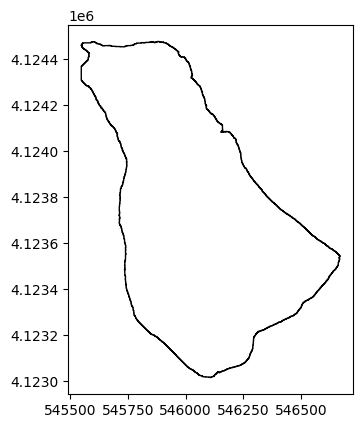

In [175]:
fig, ax = plt.subplots()
bhcatch_gdf.plot(ax=ax, facecolor='none')
# ax.set_xticks([0, 1, 2])
# # gdf.plot(ax=ax)
# # ax.imshow(slcatch + bhcatch)

Streamlab watershed delineation

In [90]:
grid = Grid.from_raster(r"C:\Users\dego\Documents\local_files\Fieldwork\corrected_dem.tif")

streamlab_ppx = 549236
streamlab_ppy = 4118326


x_snap, y_snap = grid.snap_to_mask(acc > 2000000, (streamlab_ppx, streamlab_ppy))

slcatch = grid.catchment(x=x_snap, y=y_snap, fdir=fdir, dirmap=dirmap, xytype='coordinate')


# clipped_catch = grid.view(slcatch)

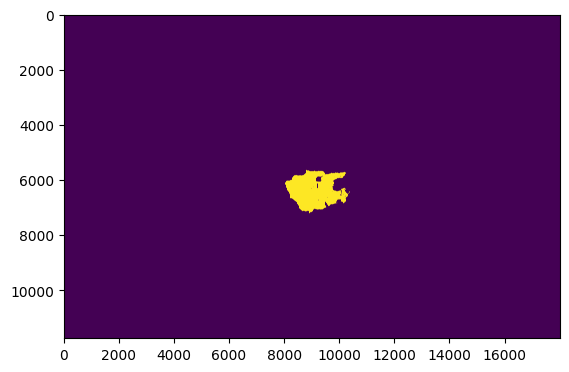

In [91]:
plt.imshow(slcatch)

In [113]:
def hillshade(array,azimuth,angle_altitude):
    azimuth = 360.0 - azimuth 
    
    x, y = np.gradient(array)
    slope = np.pi/2. - np.arctan(np.sqrt(x*x + y*y))
    aspect = np.arctan2(-x, y)
    azm_rad = azimuth*np.pi/180. #azimuth in radians
    alt_rad = angle_altitude*np.pi/180. #altitude in radians
 
    shaded = np.sin(alt_rad)*np.sin(slope) + np.cos(alt_rad)*np.cos(slope)*np.cos((azm_rad - np.pi/2.) - aspect)
    
    return 255*(shaded + 1)/2


hs = (hillshade(dem, 315, 45))

In [117]:
from rasterio.plot import show

In [118]:
grid.affine

Affine(1.0, 0.0, 539481.999981172,
       0.0, -1.0, 4126905.0000217827)

In [123]:
slpoint = gpd.GeoDataFrame(geometry=gpd.points_from_xy([streamlab_ppx], [streamlab_ppy]), crs=32617)

(4116000.0, 4126000.0)

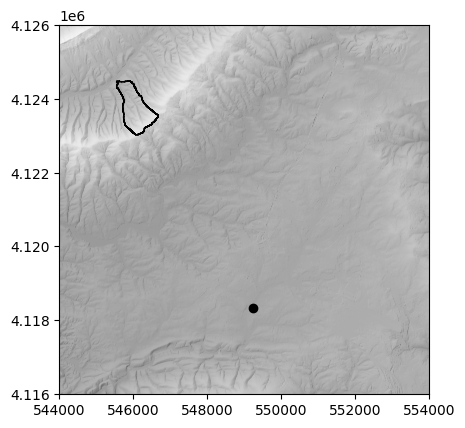

In [139]:
fig, bigmap = plt.subplots()
show(hs, cmap='Grays_r', transform=grid.affine, ax=bigmap, zorder=1, vmin=hs.min(), vmax=hs.max(), alpha=0.5)
show(dem, cmap='Grays_r', transform=grid.affine, ax=bigmap, zorder=0, vmin=dem.min(), vmax=dem.max())
slpoint.plot(ax=bigmap, color='black', zorder=2)
bhcatch_gdf.plot(ax=bigmap, facecolor='none', edgecolor='black', zorder=3)

bigmap.set_xlim(544000, 554000)
bigmap.set_ylim(4116000, 4126000)


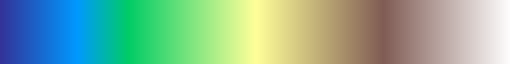